In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
filepath = r'C:\Users\Asus\Desktop\DS Purwa\Important Docs\Mall_Customers.csv'
df_raw = pd.read_csv(filepath)
df = df_raw.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


In [36]:
df.describe(include='int64')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Insight gain from the dataset:**
1. The dataset has 200 entries
2. Gender distribution:
    - Male: 88
    - Female: 112 <br>
    Female is the most common gender in the mall
3. Age distribution:
    - Average age = 38
    - Minimum age = 18
    - Maximum age = 70
    - Median age = 36 <br>
    So we can conclude that the most frequent are the working age people
4. Annual income distribution:
    - Average income = 60,560
    - Minimum income = 15,000
    - Maximum income = 137,000
    - Median income = 61,500<br>
    So we can conclude that the median and mean is almost the same, indicating that the income is symmetrical.
5. Spending score:
    - Average spending score = 50.2
    - Minimum spending score = 1
    - Maximum spending score = 99
    - Median spending score = 50 <br>
    So we can conclude that the distribution is symmetrical and the spending score is not skewed.   


In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the dataset.

In [38]:
dup = df.duplicated().sum()

print("Number of duplicate rows: ", dup)

Number of duplicate rows:  0


Now we import the kmeans clustering library and start clustering the data.


In [39]:
from sklearn.cluster import KMeans

# Load necessary features

X = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
X 

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,Male,15,39
1,21,Male,15,81
2,20,Female,16,6
3,23,Female,16,77
4,31,Female,17,40
...,...,...,...,...
195,35,Female,120,79
196,45,Female,126,28
197,32,Male,126,74
198,32,Male,137,18


In [40]:
from sklearn.preprocessing import StandardScaler

X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13880\948065140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})


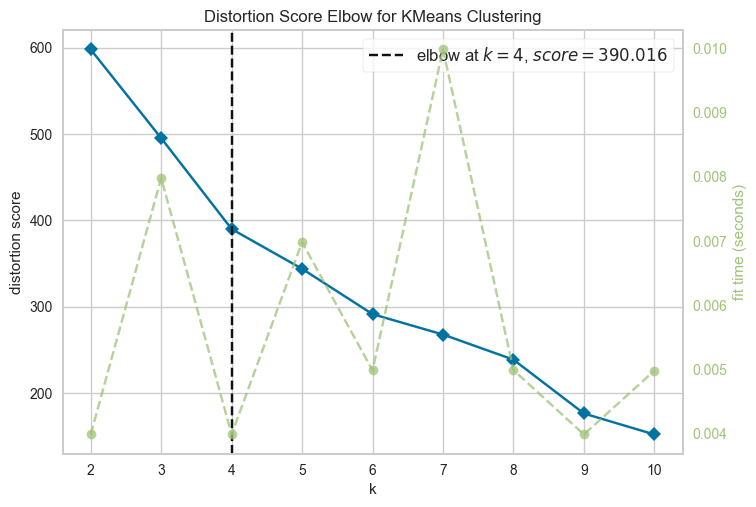

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_scaled)
Elbow_M.show()

From the graph it shows that the number of cluster should be 4. Now lets compare with the other cluster numbers.

In [42]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


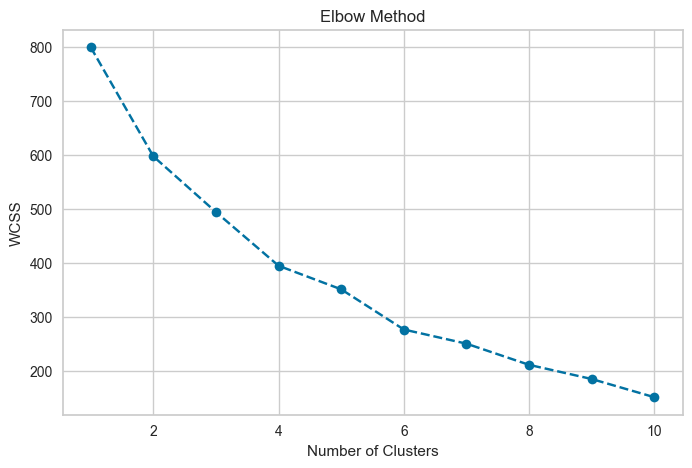

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

list_n_clusters = range(2,10)
list_sil = []
list_inertia = []

for i in list_n_clusters:

    kmeans = KMeans(n_clusters=i, random_state=0) 
    kmeans.fit(X)
    cluster_name = kmeans.labels_ 
    sil = silhouette_score(X_scaled, cluster_name, random_state=0)
    list_sil.append(sil)
    inertia = kmeans.inertia_
    list_inertia.append(inertia)

In [47]:
df_inertia = pd.DataFrame()
df_inertia['cluster_number'] = list_n_clusters
df_inertia['inertia'] = list_inertia
df_inertia['silhouette_score'] = list_sil
df_inertia

,cluster_number,inertia,silhouette_score
0,2,212889.442455,0.232503
1,3,143391.592360,0.208352
2,4,105299.987422,0.269895
3,5,82657.054767,0.221617
4,6,58387.211043,0.264488
5,7,52544.814633,0.253051
6,8,44389.807674,0.226980
7,9,40670.989962,0.207888


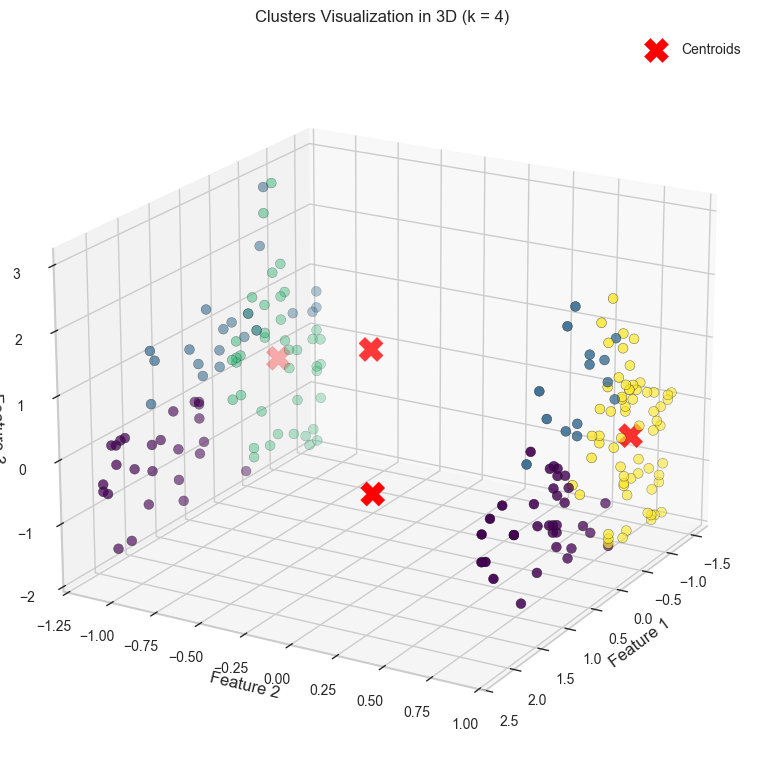

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters
scatter = ax.scatter(
    X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
    c=df['Clusters'], cmap='viridis', marker='o', edgecolor='k', s=50
)

# Scatter plot for centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
    s=300, c='red', label='Centroids', marker='X'
)

# Set labels and title
ax.set_title('Clusters Visualization in 3D (k = 4)')
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Feature 3', fontsize=12)

# Adjust layout and view angle
plt.tight_layout()
ax.view_init(elev=20, azim=30)  # Adjust view angle for better visibility

# Add legend and show plot
ax.legend()
plt.show()


Lets see the profiling of the customers

In [52]:
# Grouping by clusters and calculating mean statistics
cluster_profile = df.groupby('Clusters').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
}).round(2)

# Renaming columns for clarity
cluster_profile.columns = ['Age_Mean', 'Age_Min', 'Age_Max', 
                           'Income_Mean', 'Income_Min', 'Income_Max', 
                           'SpendingScore_Mean', 'SpendingScore_Min', 'SpendingScore_Max']
cluster_profile


,Age_Mean,Age_Min,Age_Max,Income_Mean,Income_Min,Income_Max,SpendingScore_Mean,SpendingScore_Min,SpendingScore_Max
Clusters,,,,,,,,,
0,54.70,35,70,46.9,18,79,39.93,3,60
1,41.26,19,59,88.5,71,137,16.76,1,39
2,28.69,18,40,60.9,15,137,70.24,35,97
3,29.38,18,45,58.3,16,120,64.44,6,99


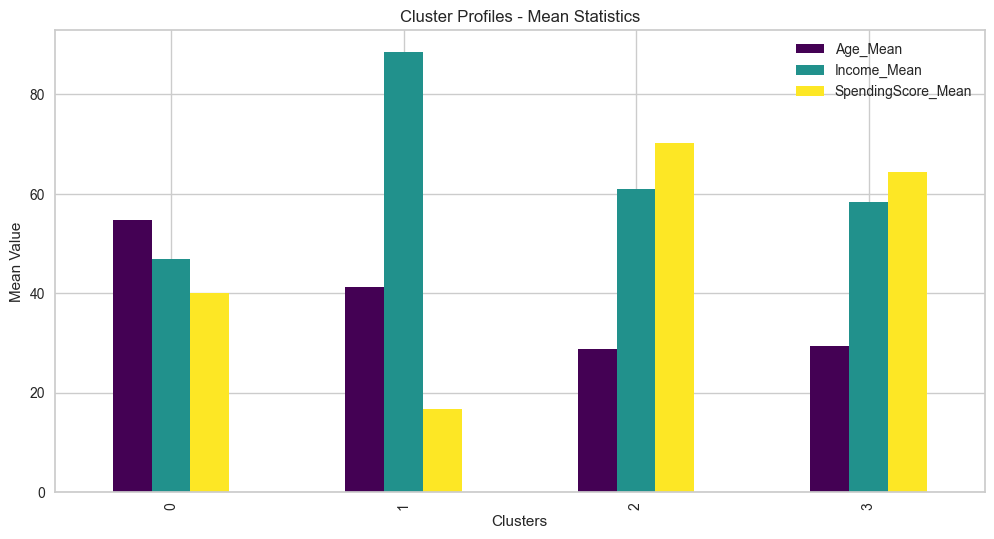

In [53]:
# Visualize profiles (e.g., bar plot for mean statistics)
cluster_profile[['Age_Mean', 'Income_Mean', 'SpendingScore_Mean']].plot(kind='bar', figsize=(12, 6), 
                                                                        title='Cluster Profiles - Mean Statistics', 
                                                                        colormap='viridis')
plt.ylabel('Mean Value')
plt.show()

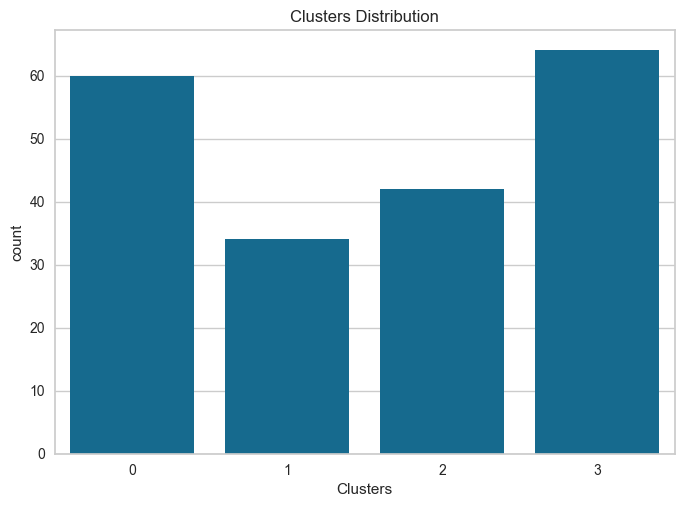

In [60]:
sns.countplot(x=df['Clusters'])
plt.title('Clusters Distribution')
plt.show()

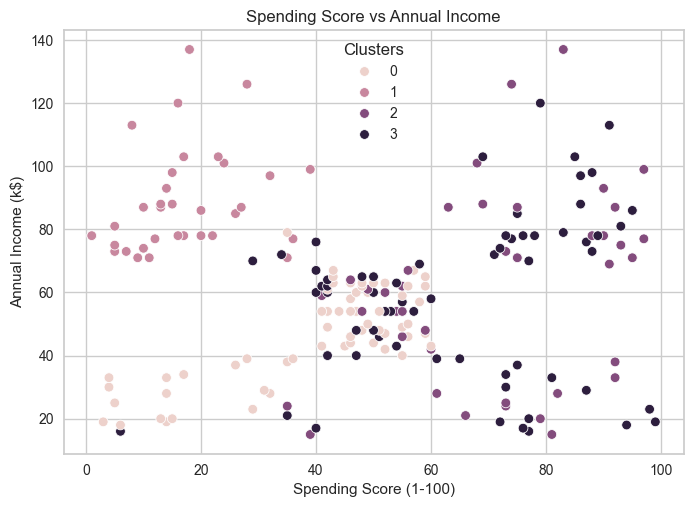

In [61]:
sns.scatterplot(data=df, x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=df['Clusters'])
plt.title('Spending Score vs Annual Income')
plt.legend
plt.show()